## Example of how to use data

### Primer

1) using git switch your branch to the akanni branch: 
    git pull origin david

2) Open the zip folder I have sent you

    There should be a folder called Checkpoints.

    Save this in your working directory for this project
 


### Data Layout

The Checkpoints folder contains save data for different models trained. 

Each subfolder is a model type e.g. lognormal or compound_poisson that has been trained.

Each subfolder will have a directory structure as follows:

* lognormal
    * version0
        * checkpoints
    * version1
        * checkpoints


## Loading in Saved Predictions

In [10]:
## Example of how to load in the model's predictions for a specific Town
# This cell allows you to specific which model to retreive
model_version = 1
target_distribution = "gamma_hurdle"
base_nn = "HLSTM" #(Keep this fixed)

In [11]:
# Run this to get the prediction data in a variable named city_data
# Getting data
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"../Checkpoints/DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )
city_data = test_output['Cairns'] 

C:\Users\david\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [12]:
city_data.keys()


dict_keys(['pred_mu', 'pred_disp', 'target_did_rain', 'target_rain_value', 'date', 'pred_p'])

## city data contains the following:
* Pred_mu: Prediction for mean term of distribution
* Pred_disp: Prediction for dispersion term
* Pred_p: Prediction for p term

* True observed rain value
* Dates

### Example of processing Data




In [13]:
# Since our model predicts a week of data at once, we essentiall have predictions as follows:
# pred1 = [day1, day2, day3, day4, day5, day6, day7]
# pred2 = [day2, day3, day4, day5, day6, day7, day8]
# pred3 = [day3, day4, day5, day6, day7, day8, day9]

#Therefore to get the non overlapping sequence [day1, day2, .... day7,day8, da9,....]
#we do the the following

day_idx = 2
pred_mu = city_data['pred_mu'][:,day_idx] #.shape
pred_p = city_data['pred_p'][:,day_idx] 
pred_disp = city_data['pred_disp'][:, day_idx]

target_rain_value = city_data['target_rain_value'][:,day_idx]
dates = [ date_index[day_idx] for date_index in city_data['date'] if len(date_index)>day_idx]

### Getting mean value from distribution parameter predictions pred_mu and pred_p and pred_disp
To retreive the mean prediction from our prediction for the distribution parameters simply do the following

In [14]:
mean = model.target_distribution.get_mean(pred_mu, pred_disp, pred_p)
variance = model.target_distribution.get_variance(pred_mu, pred_disp, pred_p)
p = pred_p

'''import matplotlib.pyplot as plt
plt.plot(mean)
plt.show()
plt.plot(variance)
plt.show()
plt.plot(p)
plt.show()
print([mean,variance,p])'''


'import matplotlib.pyplot as plt\nplt.plot(mean)\nplt.show()\nplt.plot(variance)\nplt.show()\nplt.plot(p)\nplt.show()\nprint([mean,variance,p])'

# Which Model Versions to use during testing now

In [15]:
# Compound Poisson -> version [13]
# Gamma -> version 1
# lognormal -> version 4


In [72]:
cities=sorted(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
             'NorahHead', 'NorfolkIsland',  'Richmond',
            'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
            'Wollongong', 'Canberra', 'Tuggeranong',  'Ballarat',
            'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
            'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
            'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
            'Perth',  'Walpole', 'Hobart', 
            'AliceSprings', 'Darwin', 'Uluru'])
 #had to remove 'Albany' , 'Katherine','Launceston','MountGinini','Newcastle','Penrith','SalmonGums',
sys.path.append('../')
import glms
import pickle
import torch

path_ = f"../Checkpoints/DGLM_{base_nn}_{target_distribution}/lightning_logs/version_{model_version}/"
ckpt_path = glms.NeuralDGLM.get_ckpt_path(os.path.join(path_,"checkpoints"))

scaler_features, scaler_target = glms.NeuralDGLM.load_scalers(path_)
model = glms.NeuralDGLM.load_from_checkpoint(ckpt_path, save_hparams=False, scaler_features=scaler_features, scaler_target=scaler_target)
model.freeze()
model.eval()

test_output = pickle.load( open(os.path.join(path_,"test_output.pkl"),"rb") )

In [73]:
#print(pred_mu.tolist())
#print(pred_disp.tolist())
gamma_allcities=[]

for i,location in enumerate(cities):
    city_data = test_output[location] 
    print(i,location)
    city_data.keys()
    day_idx = 2
    pred_mu = city_data['pred_mu'][:,day_idx] #.shape
    pred_p = city_data['pred_p'][:,day_idx] 
    pred_disp = city_data['pred_disp'][:, day_idx]
    target_rain_value = city_data['target_rain_value'][:,day_idx]
    dates = [ date_index[day_idx] for date_index in city_data['date'] if len(date_index)>day_idx]
    gamma_allcities.append([i,location,pred_mu,pred_disp,pred_p,target_rain_value])
    

0 Adelaide
1 Albury
2 AliceSprings
3 BadgerysCreek
4 Ballarat
5 Brisbane
6 Cairns
7 Canberra
8 Cobar
9 CoffsHarbour
10 Dartmoor
11 Darwin
12 GoldCoast
13 Hobart
14 Moree
15 MountGambier
16 Nhil
17 NorahHead
18 NorfolkIsland
19 Nuriootpa
20 PearceRAAF
21 Perth
22 PerthAirport
23 Portland
24 Richmond
25 Sydney
26 SydneyAirport
27 Townsville
28 Tuggeranong
29 Uluru
30 WaggaWagga
31 Walpole
32 Watsonia
33 Williamtown
34 Witchcliffe
35 Wollongong
36 Woomera


In [212]:
### Gamma ROC

from sklearn.metrics import roc_curve, auc
from scipy.special import gamma
from math import exp
import numpy as np
import scipy.stats as scs

# Gamma: alpha = 1/disp, beta = alpha/mu

g_0mm=[]
g_0mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>0.1:
            g_0mm.append(1)
        else:
            g_0mm.append(0)
        #vetor of 'probability it rained this much'
        g_alpha=1/place[3][day]
        g_beta=g_alpha/place[2][day]
        g_0mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(0.1))))
print('0 done')

g_5mm=[]
g_5mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>5:
            g_5mm.append(1)
        else:
            g_5mm.append(0)
        #vetor of 'probability it rained this much'
        g_alpha=1/place[3][day]
        g_beta=g_alpha/place[2][day]
        g_5mm_cdfx.append( 1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(5))))
print('5 done')


g_10mm=[]
g_10mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>10:
            g_10mm.append(1)
        else:
            g_10mm.append(0)
        #vetor of 'probability it rained this much'
        g_alpha=1/place[3][day]
        g_beta=g_alpha/place[2][day]
        g_10mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(10))))
print('10 done')


g_15mm=[]
g_15mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>15:
            g_15mm.append(1)
        else:
            g_15mm.append(0)
        #vetor of 'probability it rained this much'
        g_alpha=1/place[3][day]
        g_beta=g_alpha/place[2][day]
        g_15mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(15))))
print('15 done')


g_20mm=[]
g_20mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>20:
            g_20mm.append(1)
        else:
            g_20mm.append(0)
        #vetor of 'probability it rained this much'
        g_alpha=1/place[3][day]
        g_beta=g_alpha/place[2][day]
        g_20mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(20))))
print('20 done')


g_25mm=[]
g_25mm_cdfx=[]

for place in gamma_allcities:
    for day in range(len(place[5])):
        #vector of 'did it rain this much'
        if place[5][day]>25:
            g_25mm.append(1)
        else:
            g_25mm.append(0)
        #vetor of 'probability it rained this much'
        g_alpha=1/place[3][day]
        g_beta=g_alpha/place[2][day]
        g_25mm_cdfx.append(1-((1-place[4][day])+(place[4][day]*scs.gamma(loc=1/place[3][day],scale=place[3][day]*place[2][day],a=1/place[3][day]).cdf(25))))
print('25 done')



0 done
5 done
10 done
15 done
20 done
25 done


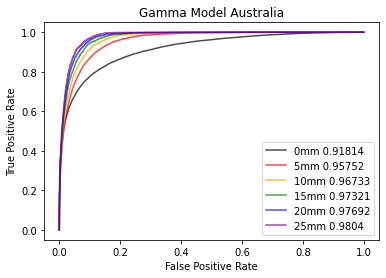

In [226]:
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### GAMMA

fpr_0mm, tpr_0mm, _ = metrics.roc_curve(g_0mm,g_0mm_cdfx)
auc0 = metrics.roc_auc_score(g_0mm,g_0mm_cdfx)
plt.plot(fpr_0mm,tpr_0mm,label='AUC='+str(auc0),color='black',alpha=0.7)

fpr_5mm, tpr_5mm, _ = metrics.roc_curve(g_5mm,g_5mm_cdfx)
auc5 = metrics.roc_auc_score(g_5mm,g_5mm_cdfx)
plt.plot(fpr_5mm,tpr_5mm,label='AUC='+str(auc5),color='red',alpha=0.7)

fpr_10mm, tpr_10mm, _ = metrics.roc_curve(g_10mm,g_10mm_cdfx)
auc10 = metrics.roc_auc_score(g_10mm,g_10mm_cdfx)
plt.plot(fpr_10mm,tpr_10mm,label='AUC='+str(auc10),color='orange',alpha=0.7)

fpr_15mm, tpr_15mm, _ = metrics.roc_curve(g_15mm,g_15mm_cdfx)
auc15 = metrics.roc_auc_score(g_15mm,g_15mm_cdfx)
plt.plot(fpr_15mm,tpr_15mm,label='AUC='+str(auc15),color='green',alpha=0.7)

fpr_20mm, tpr_20mm, _ = metrics.roc_curve(g_20mm,g_20mm_cdfx)
auc20 = metrics.roc_auc_score(g_20mm,g_20mm_cdfx)
plt.plot(fpr_20mm,tpr_20mm,label='AUC='+str(auc20),color='blue',alpha=0.7)

fpr_25mm, tpr_25mm, _ = metrics.roc_curve(g_25mm,g_25mm_cdfx)
auc25 = metrics.roc_auc_score(g_25mm,g_25mm_cdfx)
plt.plot(fpr_25mm,tpr_25mm,label='AUC='+str(auc25),color='purple',alpha=0.7)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(['0mm '+str(round(auc0,5)),'5mm '+str(round(auc5,5)),'10mm '+str(round(auc10,5)),'15mm '+str(round(auc15,5)),'20mm '+str(round(auc20,5)),'25mm '+str(round(auc25,5))])
plt.title('Gamma Model Australia')
plt.savefig('ROC Gamma model')